# Simulating Planetary Orbits

Unless stated otherwise, length = AU and time = yr

# Initial Setup

In [1]:
#!gcc -shared -O2 -fPIC ode.c -o libode.so

In [1]:
import csv
import ctypes
from ctypes import *
from numpy.ctypeslib import ndpointer
import numpy as np
import matplotlib.pyplot as plt
import numba
import math
import random

In [2]:
import importlib
import odesolver
importlib.reload(odesolver)
from odesolver import *
import helpers
importlib.reload(helpers)
from helpers import *
import interfunc
importlib.reload(interfunc)
from interfunc import *

# func_2_body mercury testing

In [7]:
GM_S = 39.4229 #AU^3.yr^{-2} solar mass parameter

a_0 = 0.39
e_0 = 0.206
theta_E_0 = -3*np.pi/4
theta_0 = theta_E_0
x_0,v_x_0,y_0,v_y_0 = ellipse_to_xy(a_0, e_0, theta_0, theta_E_0)
initial_mercury = [x_0,v_x_0,y_0,v_y_0]

In [4]:
total_time = 10*orbital_period(a_0,GM_S)
step_size = orbital_period(a_0,GM_S)/400
n_steps = int(total_time/step_size)
t,sol = solve_ode(func_2_body,[0.,total_time], n_steps, initial_mercury, args=[GM_S], method="Yoshida4")
x,v_x,y,v_y = sol.T

Text(0.5, 1.0, 'Mercury Orbiting Sun Alone (10 orbital periods)')

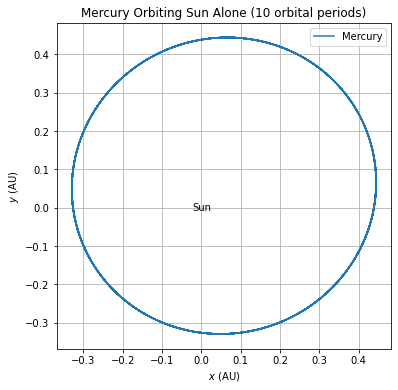

In [5]:
plt.figure(figsize=(6,6))
plt.plot(x,y,label=r"Mercury")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Mercury Orbiting Sun Alone (10 orbital periods)")

# func_n_body solar system testing

In [4]:
GM_Sun = 39.4229 #AU^3.yr^{-2} solar mass parameter

# Earth's standard gravitational parameter
GM_Ear = 0.00011841685 #AU^3/yr^2

# https://nssdc.gsfc.nasa.gov/planetary/factsheet/planet_table_ratio.html
GM_Mer = GM_Ear*0.0553
GM_Ven = GM_Ear*0.815
GM_Mar = GM_Ear*0.107
GM_Jup = GM_Ear*317.8
GM_Sat = GM_Ear*95.2
GM_Ura = GM_Ear*14.5
GM_Nep = GM_Ear*17.1

In [7]:
# https://www.princeton.edu/~willman/planetary_systems/Sol/
init_Mer = np.array(ellipse_to_xy(0.3870993, 0.20564, 0., 0.))
init_Ven = np.array(ellipse_to_xy(0.723336, 0.00678, 0., 0.))
init_Ven[ind_v_y(0)] *= -1
init_Ear = np.array(ellipse_to_xy(1.000003, 0.01671, 0., 0.))
init_Mar = np.array(ellipse_to_xy(1.52371, 0.09339, 0., 0.))
init_Jup = np.array(ellipse_to_xy(5.2029, 0.0484, 0., 0.))
init_Sat = np.array(ellipse_to_xy(9.537, 0.0539, 0., 0.))
init_Ura = np.array(ellipse_to_xy(19.189, 0.04726, 0., 0.))
init_Nep = np.array(ellipse_to_xy(30.0699, 0.00859, 0., 0.))

In [8]:
n_planets = 8
params = [GM_Sun, n_planets, GM_Mer, GM_Ven, GM_Ear, GM_Mar, GM_Jup, GM_Sat, GM_Ura, GM_Nep]
init_solar_planets = np.concatenate((init_Mer,init_Ven,init_Ear,init_Mar,init_Jup,init_Sat,init_Ura,init_Nep))

a_Nep = 30.0699
total_time = orbital_period(a_Nep,GM_S) # 1 Neptune period
step_size = orbital_period(a_0,GM_S)/100 # 1/100 of Mercury period
n_steps = int(total_time/step_size)
t,sol_untransposed = solve_ode(func_n_body,[0.,total_time], n_steps, init_solar_planets, args=params, method="Yoshida4")
sol = sol_untransposed.T

Text(0.5, 1.0, 'All Planets (1 Neptune period)')

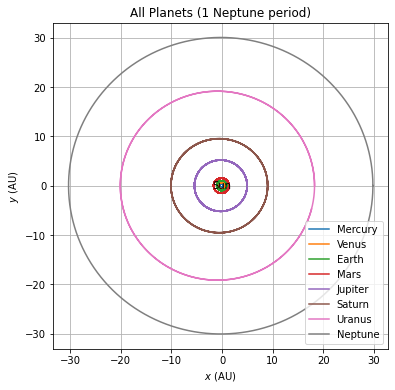

In [9]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Mercury")
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Venus")
plt.plot(sol[ind_x(2)],sol[ind_y(2)],label=r"Earth")
plt.plot(sol[ind_x(3)],sol[ind_y(3)],label=r"Mars")
plt.plot(sol[ind_x(4)],sol[ind_y(4)],label=r"Jupiter")
plt.plot(sol[ind_x(5)],sol[ind_y(5)],label=r"Saturn")
plt.plot(sol[ind_x(6)],sol[ind_y(6)],label=r"Uranus")
plt.plot(sol[ind_x(7)],sol[ind_y(7)],label=r"Neptune")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"All Planets (1 Neptune period)")

Text(0.5, 1.0, 'Inner Planets (1 Neptune period)')

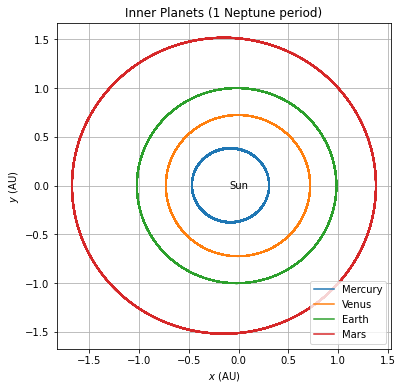

In [10]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Mercury")
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Venus")
plt.plot(sol[ind_x(2)],sol[ind_y(2)],label=r"Earth")
plt.plot(sol[ind_x(3)],sol[ind_y(3)],label=r"Mars")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Inner Planets (1 Neptune period)")

In [37]:
init_Mer = np.array(ellipse_to_xy(random.gauss(0.3870993, 1.), random.gauss(0.20564, 1.), 0., 0.))
init_Ven = np.array(ellipse_to_xy(random.gauss(0.723336, .0001), random.gauss(0.00678, .0001), 0., 0.))
init_Ven[ind_v_y(0)] *= -1
init_Ear = np.array(ellipse_to_xy(random.gauss(1.000003, .0001), random.gauss(0.01671, .0001), 0., 0.))
init_Mar = np.array(ellipse_to_xy(random.gauss(1.52371, .0001), random.gauss(0.09339, .0001), 0., 0.))
init_Jup = np.array(ellipse_to_xy(random.gauss(5.2029, .0001), random.gauss(0.0484, .0001), 0., 0.))
init_Sat = np.array(ellipse_to_xy(random.gauss(9.537, .0001), random.gauss(0.0539, .0001), 0., 0.))
init_Ura = np.array(ellipse_to_xy(random.gauss(19.189, .0001), random.gauss(0.04726, .0001), 0., 0.))
init_Nep = np.array(ellipse_to_xy(random.gauss(30.0699, .0001), random.gauss(0.00859, .0001), 0., 0.))

In [38]:
# randomize simulation

n_planets = 8
params = [GM_Sun, n_planets, GM_Mer, GM_Ven, GM_Ear, GM_Mar, GM_Jup, GM_Sat, GM_Ura, GM_Nep]
noisy_planets = np.concatenate((init_Mer,init_Ven,init_Ear,init_Mar,init_Jup,init_Sat,init_Ura,init_Nep))

a_Nep = 30.0699
total_time = 1000 * orbital_period(a_Nep,GM_S) # 1 Neptune period
step_size = orbital_period(a_0,GM_S)/100 # 1/100 of Mercury period
n_steps = int(total_time/step_size)
t,sol_untransposed = solve_ode(func_n_body,[0.,total_time], n_steps, init_solar_planets, args=params, method="Yoshida4")
sol = sol_untransposed.T

In [39]:
print(init_solar_planets)
print(noisy_planets)

[ 3.07496200e-01  7.61815267e-16  0.00000000e+00  1.24413875e+01
  7.18431782e-01  4.55444274e-16  0.00000000e+00 -7.43796945e+00
  9.83292950e-01  9.52044104e-08  0.00000000e+00  6.38905980e+00
  1.38141072e+00  3.42284207e-16  0.00000000e+00  5.58992532e+00
  4.95107964e+00  1.77041171e-16  0.00000000e+00  2.89130175e+00
  9.02295570e+00  1.31487968e-16  0.00000000e+00  2.14736148e+00
  1.82821279e+01  2.24085559e-08  0.00000000e+00  1.50381272e+00
  2.98115996e+01  7.07661248e-17  0.00000000e+00  1.15569852e+00]
[-9.33479655e-02  1.58773965e-15 -0.00000000e+00 -2.59297562e+01
  7.18471623e-01  4.55416750e-16  0.00000000e+00 -7.43751995e+00
  9.83349122e-01  3.91208025e-16  0.00000000e+00  6.38891189e+00
  1.38173640e+00  3.42217193e-16  0.00000000e+00  5.58883088e+00
  4.95143378e+00  1.77028722e-16  0.00000000e+00  2.89109844e+00
  9.02332401e+00  1.31481484e-16  0.00000000e+00  2.14725559e+00
  1.82816242e+01  9.20841614e-17  0.00000000e+00  1.50384848e+00
  2.98084977e+01  7.0773

Text(0.5, 1.0, 'All Planets (1 Neptune period)')

/Users/maxpaik/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


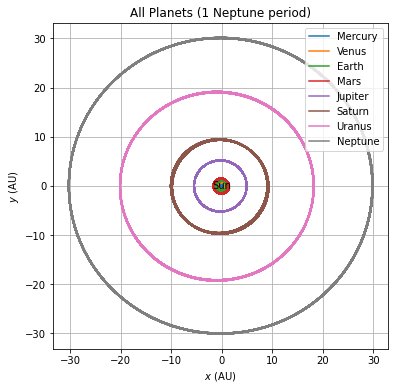

In [40]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Mercury")
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Venus")
plt.plot(sol[ind_x(2)],sol[ind_y(2)],label=r"Earth")
plt.plot(sol[ind_x(3)],sol[ind_y(3)],label=r"Mars")
plt.plot(sol[ind_x(4)],sol[ind_y(4)],label=r"Jupiter")
plt.plot(sol[ind_x(5)],sol[ind_y(5)],label=r"Saturn")
plt.plot(sol[ind_x(6)],sol[ind_y(6)],label=r"Uranus")
plt.plot(sol[ind_x(7)],sol[ind_y(7)],label=r"Neptune")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"All Planets (1 Neptune period)")

In [32]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Mercury")
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Venus")
plt.plot(sol[ind_x(2)],sol[ind_y(2)],label=r"Earth")
plt.plot(sol[ind_x(3)],sol[ind_y(3)],label=r"Mars")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Inner Planets (1 Neptune period)")

Text(0.5, 1.0, 'Inner Planets (1 Neptune period)')

/Users/maxpaik/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x432 with 1 Axes>

In [ ]:
for i in range(5000):
    init_Mer = np.array(ellipse_to_xy(random.gauss(0.3870993, .0001), random.gauss(0.20564, .0001), 0., 0.))
    init_Ven = np.array(ellipse_to_xy(random.gauss(0.723336, .0001), random.gauss(0.00678, .0001), 0., 0.))
    init_Ven[ind_v_y(0)] *= -1
    init_Ear = np.array(ellipse_to_xy(random.gauss(1.000003, .0001), random.gauss(0.01671, .0001), 0., 0.))
    init_Mar = np.array(ellipse_to_xy(random.gauss(1.52371, .0001), random.gauss(0.09339, .0001), 0., 0.))
    init_Jup = np.array(ellipse_to_xy(random.gauss(5.2029, .0001), random.gauss(0.0484, .0001), 0., 0.))
    init_Sat = np.array(ellipse_to_xy(random.gauss(9.537, .0001), random.gauss(0.0539, .0001), 0., 0.))
    init_Ura = np.array(ellipse_to_xy(random.gauss(19.189, .0001), random.gauss(0.04726, .0001), 0., 0.))
    init_Nep = np.array(ellipse_to_xy(random.gauss(30.0699, .0001), random.gauss(0.00859, .0001), 0., 0.))
    n_planets = 8
    
    init_Mer = list(map(lambda x : x + random.gauss(0, .02), init_Mer))
    params = [GM_Sun, n_planets, GM_Mer, GM_Ven, GM_Ear, GM_Mar, GM_Jup, GM_Sat, GM_Ura, GM_Nep]
    noisy_planets = np.concatenate((init_Mer,init_Ven,init_Ear,init_Mar,init_Jup,init_Sat,init_Ura,init_Nep))

    a_Nep = 30.0699
    total_time = 10000 * orbital_period(a_Nep,GM_Sun) # 1 Neptune period
    step_size = orbital_period(a_0,GM_S)/100 # 1/100 of Mercury period
    n_steps = int(total_time/step_size)
    t,sol_untransposed = solve_ode(func_n_body,[0.,total_time], n_steps, noisy_planets, args=params, method="Yoshida4")
    sol = sol_untransposed.T
    
    ejected = 0
    print(np.amax(sol[ind_x(0)]))
    if np.amax(sol[ind_x(0)]) > 10:
        ejected = 1
    
    with open('training.csv', mode='a') as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        data = np.ndarray.tolist(noisy_planets)
        data.append(ejected)
        writer.writerow(data)

 # other func_n_body test

[1.00000000e+00 3.84463522e-16 0.00000000e+00 6.27876580e+00
 1.25000000e+00 3.43874628e-16 0.00000000e+00 5.61589886e+00]


Text(0.5, 1.0, 'Misc Planets (1 Neptune period)')

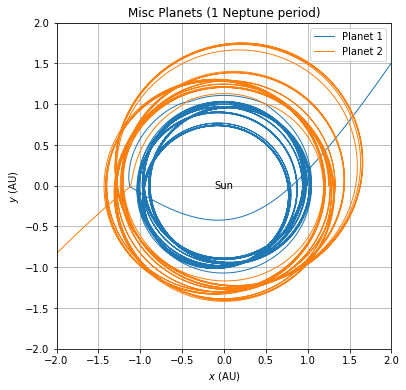

In [32]:
init_1 = np.array(old_ellipse_to_xy(1, 0., 0., 0., GM_Sun))
init_2 = np.array(old_ellipse_to_xy(1.25, 0., 0., 0., GM_Sun))

n_misc = 2
params_misc = [GM_Sun, n_misc, GM_Jup, GM_Jup]
init_misc = np.concatenate((init_1,init_2))
print(init_misc)

total_time = 0.25*orbital_period(a_Nep,GM_S) # 0.25 Neptune period
step_size = orbital_period(a_0,GM_S)/500 # 1/500 of Mercury period
n_steps = int(total_time/step_size)
t,sol_untransposed = solve_ode(func_n_body,[0.,total_time], n_steps, init_misc, args=params_misc, method="Yoshida4")
sol = sol_untransposed.T

plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Planet 1",linewidth=1)
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Planet 2",linewidth=1)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Misc Planets (1 Neptune period)")

Text(0.5, 1.0, 'Misc Planets (1 Neptune period)')

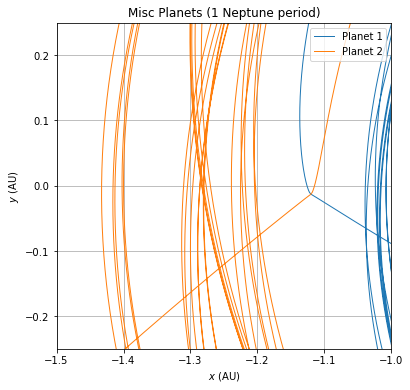

In [33]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Planet 1",linewidth=1)
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Planet 2",linewidth=1)
plt.xlim(-1.5,-1.0)
plt.ylim(-0.25,0.25)
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.title(r"Misc Planets (1 Neptune period)")